### Parte 2: Analisis Descriptivo de los Datos

La idea de este apartado es ver en teminos generales, medias, varianzas, graficar los histogramas y verificar la normalidad de los datos.

In [8]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

M_Final_DB_Num= pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')

M_Final_DB_Num = M_Final_DB_Num.drop(['Unnamed: 0','Player','G','Pos'], axis=1)

# Prueba de normalidad de Shapiro-Wilk
for var in M_Final_DB_Num:
    stat, p = shapiro(M_Final_DB_Num[var].dropna())
    print(f"{var}: p = {p:.4f} → {'Paramétrica' if p > 0.05 else 'No paramétrica'}")

WS: p = 0.0000 → No paramétrica
USG%: p = 0.0000 → No paramétrica
BPM: p = 0.0000 → No paramétrica
VORP: p = 0.0000 → No paramétrica
PER: p = 0.0000 → No paramétrica
Age: p = 0.0000 → No paramétrica
2PA: p = 0.0000 → No paramétrica
2P%: p = 0.0000 → No paramétrica
3PA: p = 0.0006 → No paramétrica
3P%: p = 0.0000 → No paramétrica
FTA: p = 0.0000 → No paramétrica
FT%: p = 0.0000 → No paramétrica
ORB: p = 0.0000 → No paramétrica
DRB: p = 0.0000 → No paramétrica
AST: p = 0.0000 → No paramétrica
STL: p = 0.0000 → No paramétrica
BLK: p = 0.0000 → No paramétrica
TOV: p = 0.0000 → No paramétrica
PF: p = 0.0000 → No paramétrica
PTS: p = 0.0000 → No paramétrica
Salary: p = 0.0000 → No paramétrica
Reliability: p = 0.0000 → No paramétrica


Podemos ver que nuestros resultados son no parametrico es decir podemos asumir que no son normales. Esto es muy comun en datos deportivos

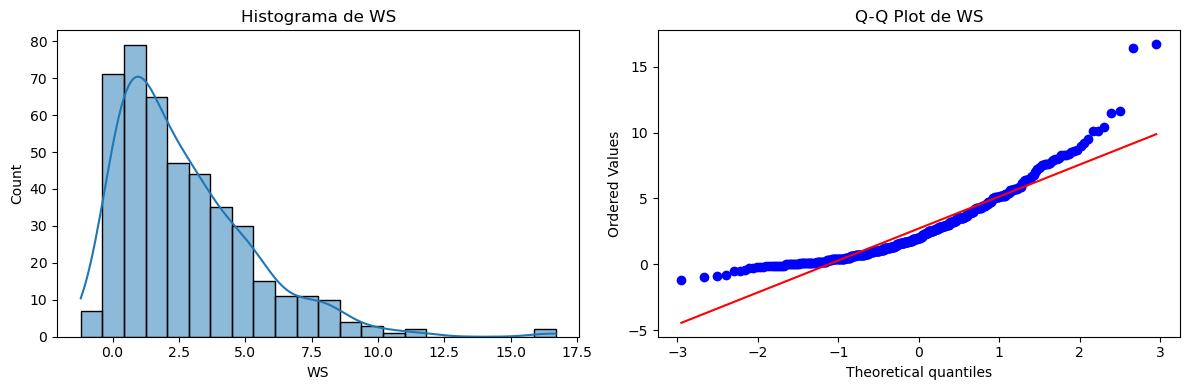

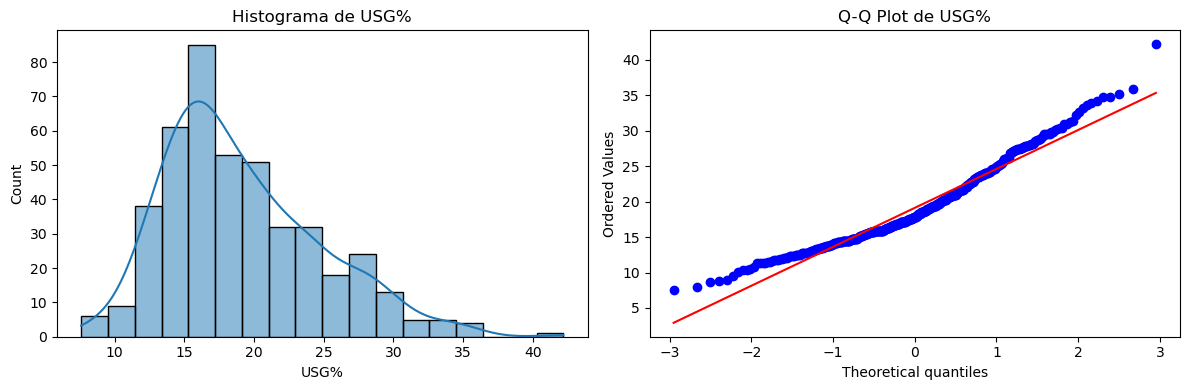

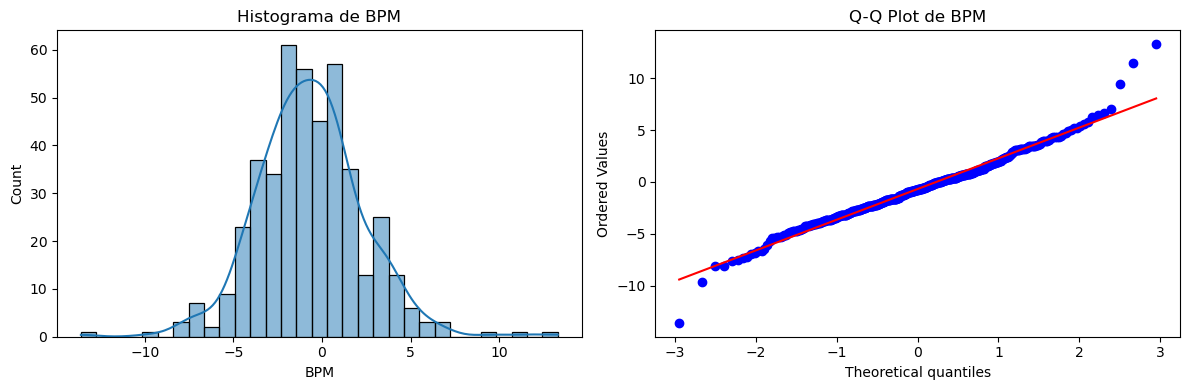

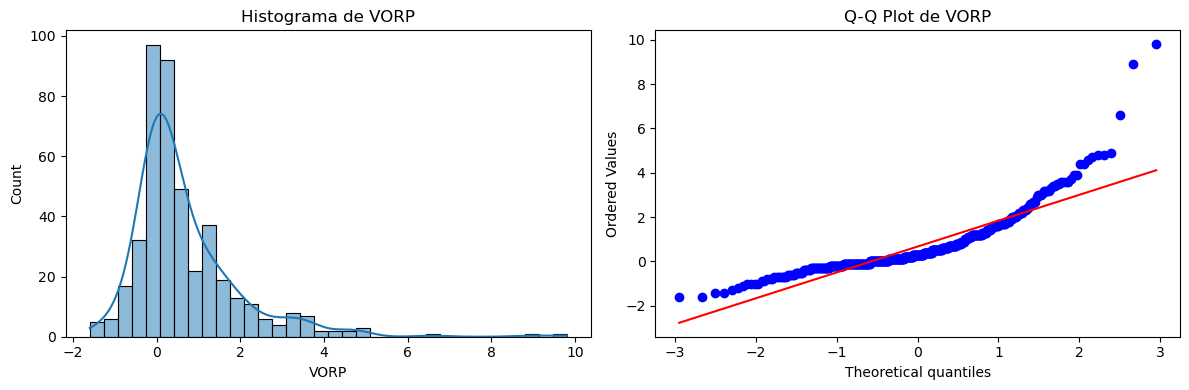

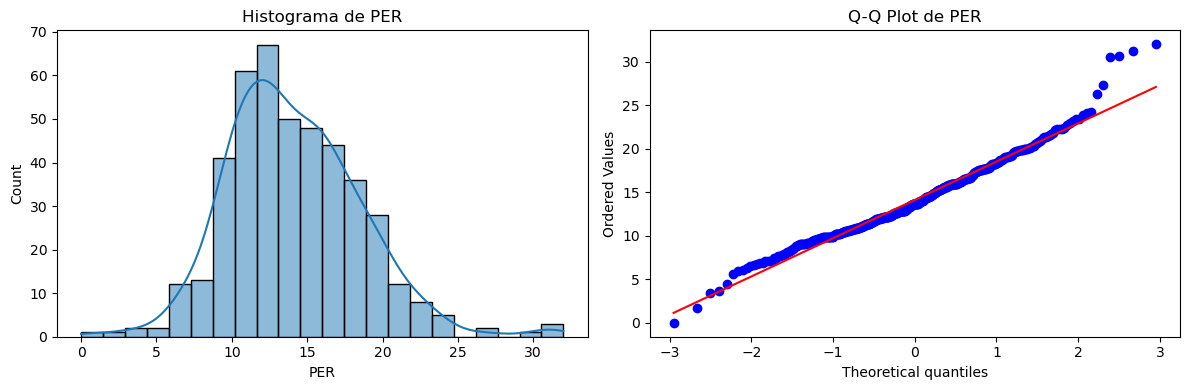

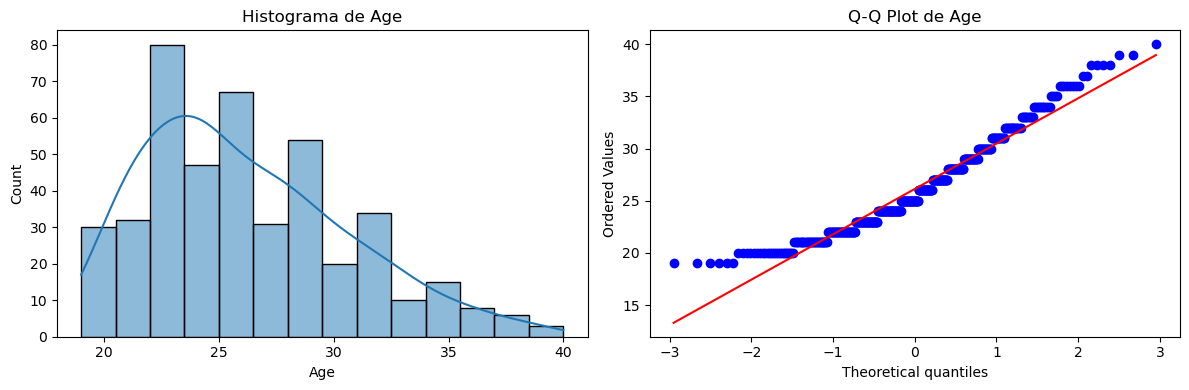

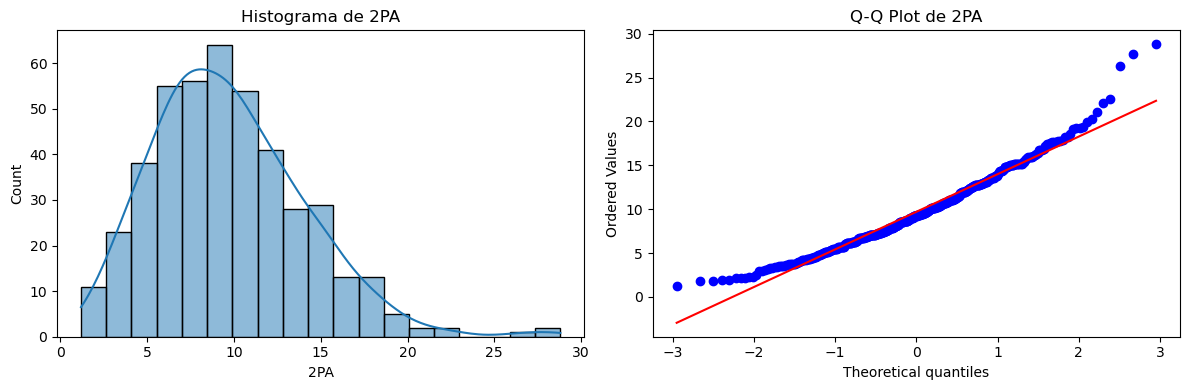

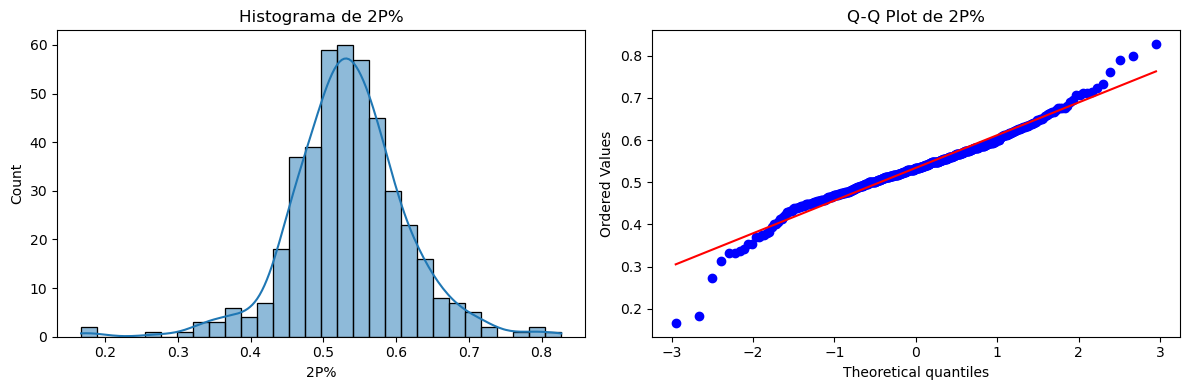

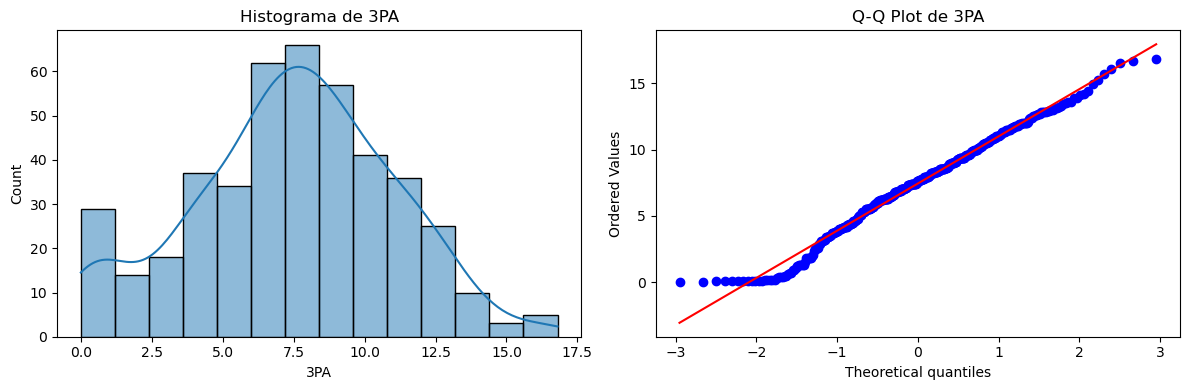

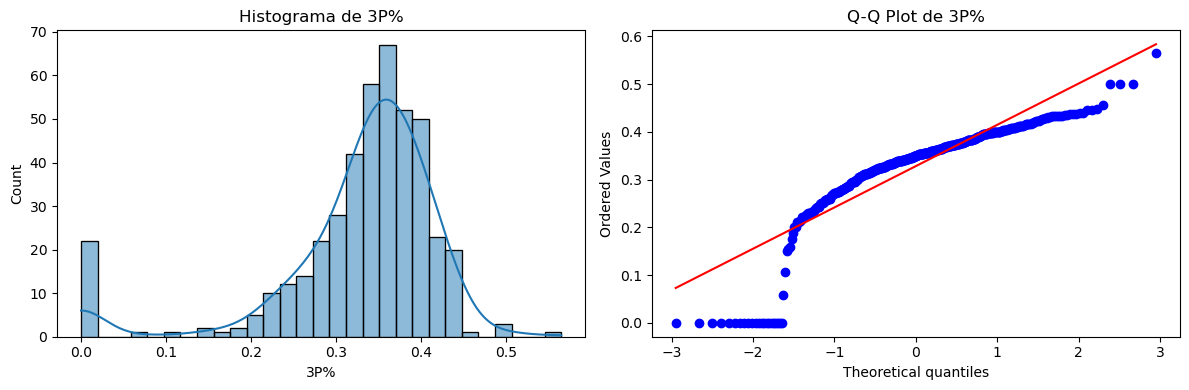

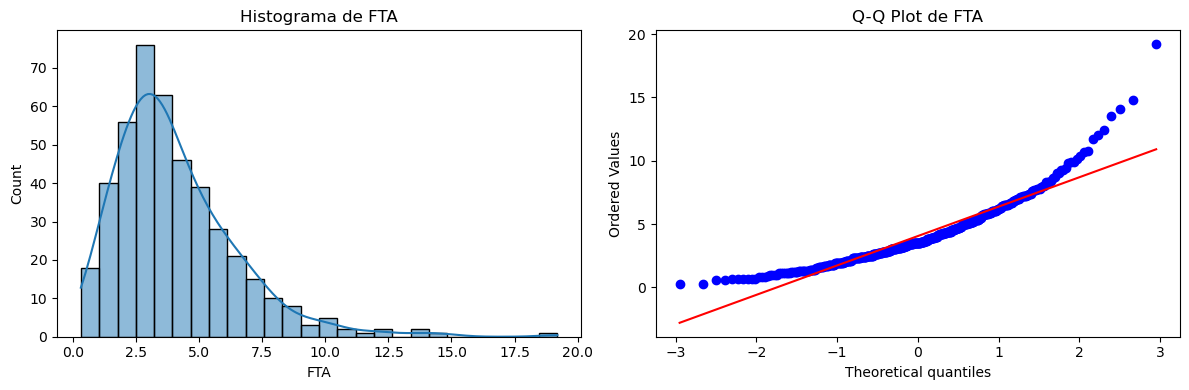

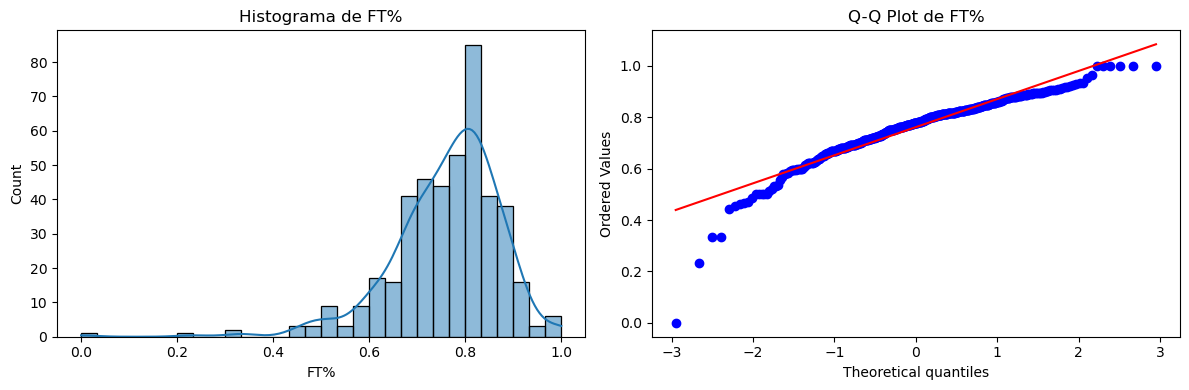

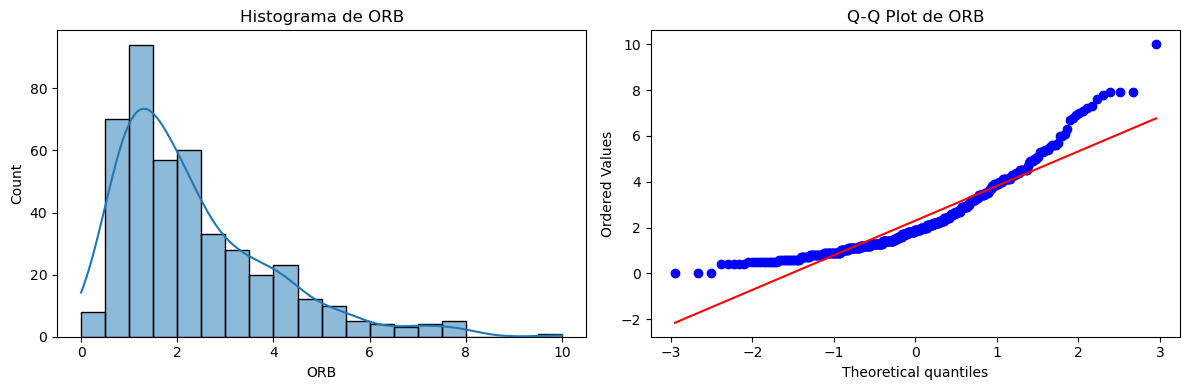

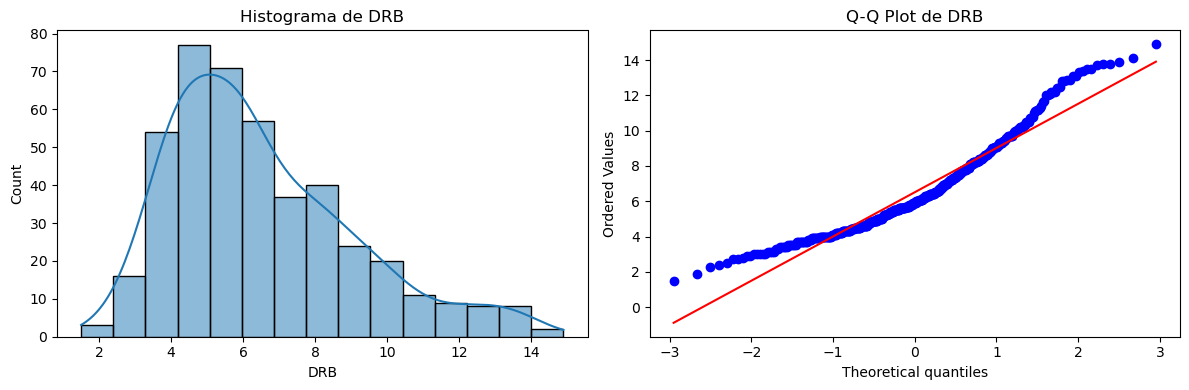

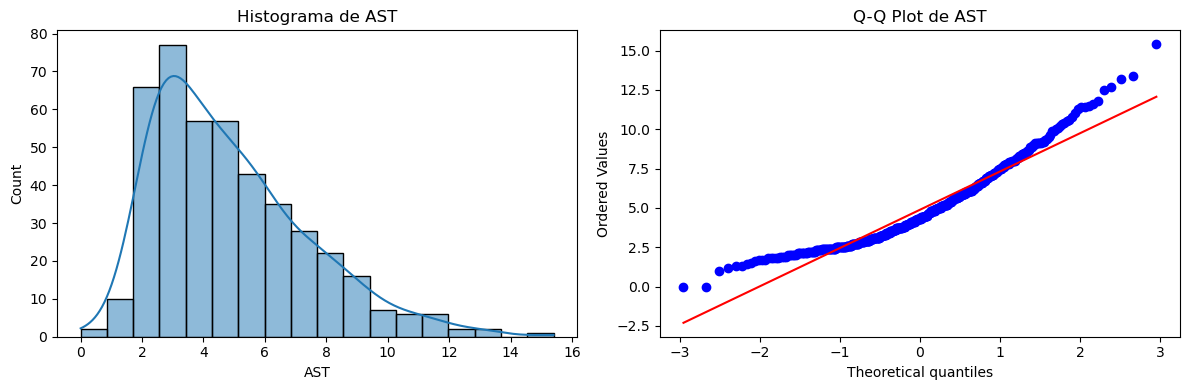

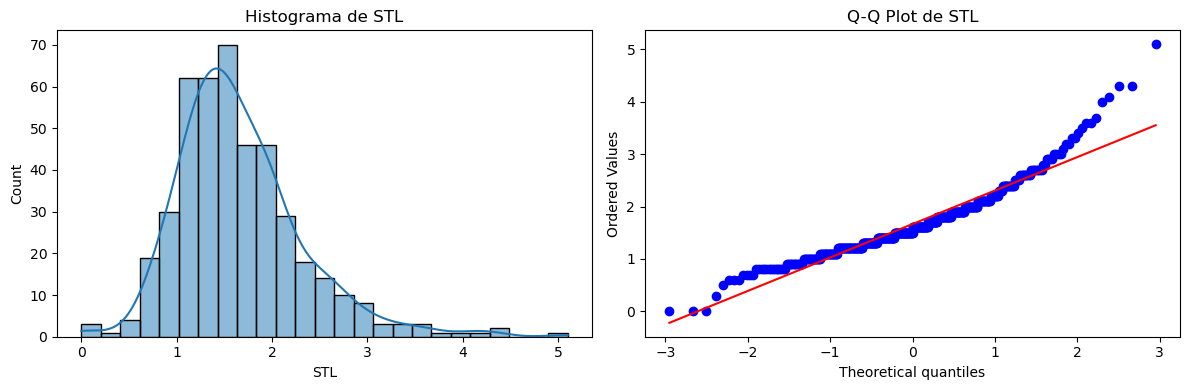

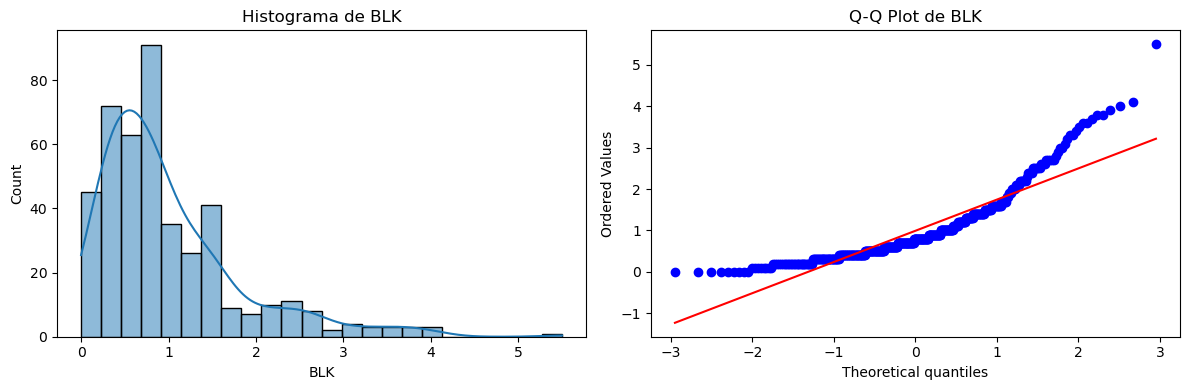

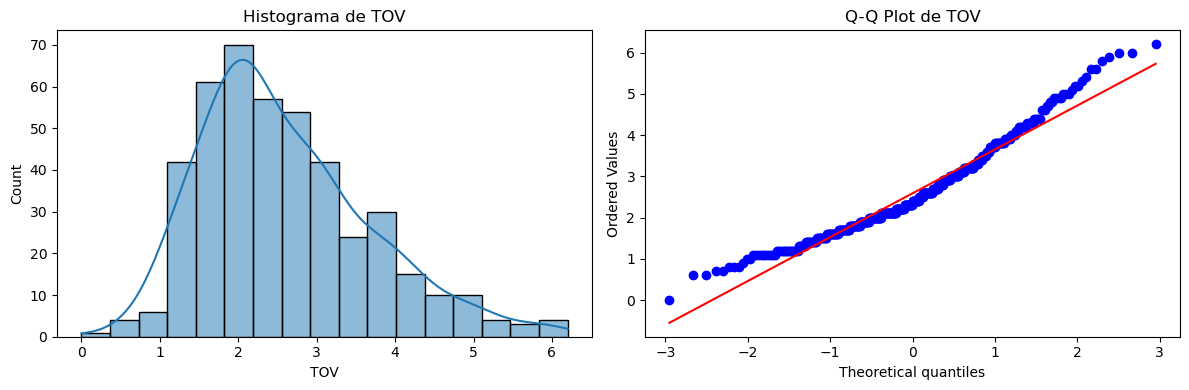

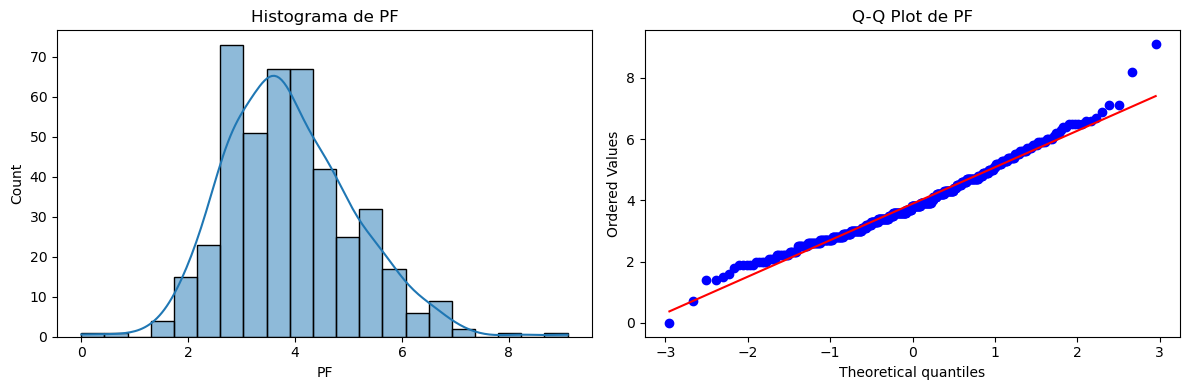

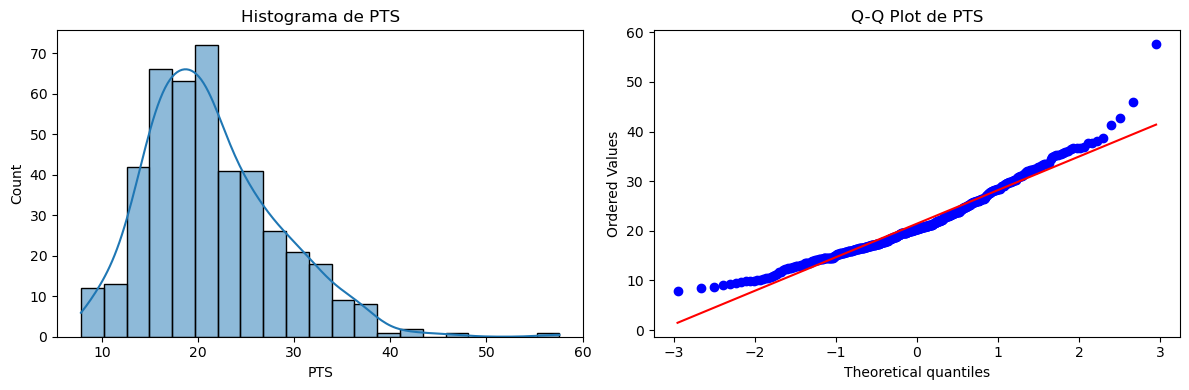

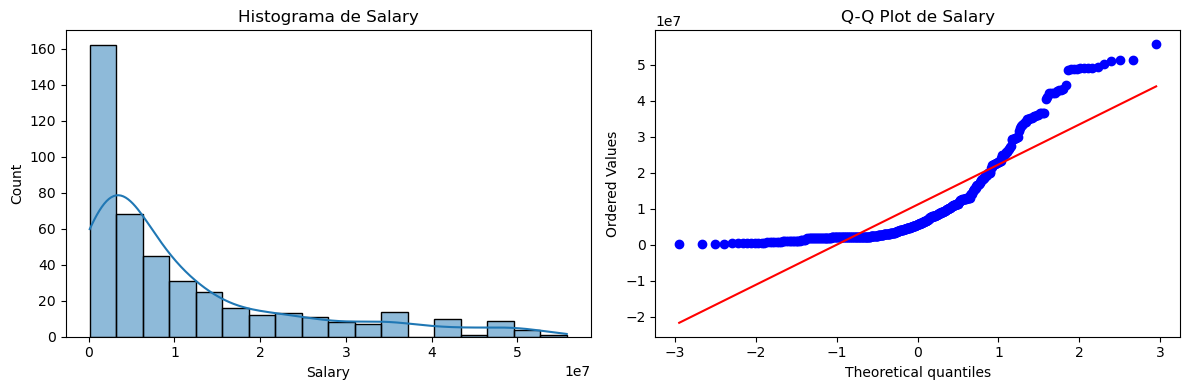

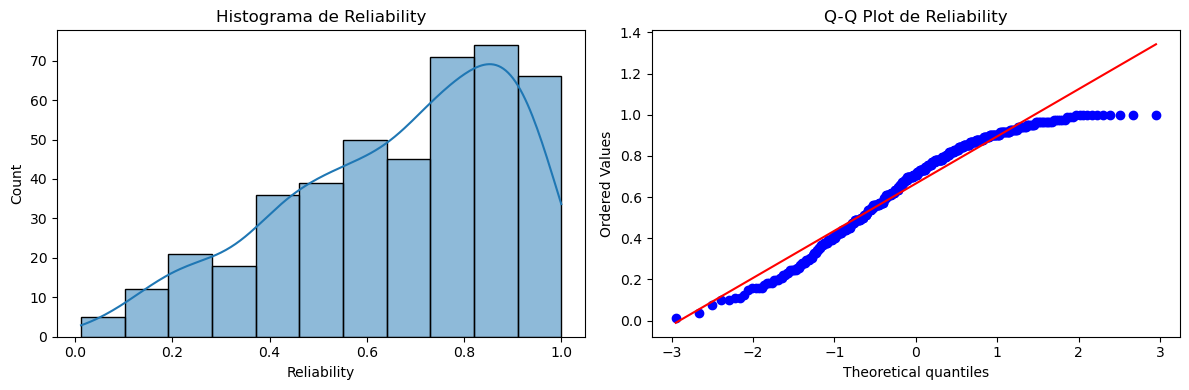

In [9]:
import scipy.stats as stats

for var in M_Final_DB_Num:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(M_Final_DB_Num[var].dropna(), kde=True)
    plt.title(f"Histograma de {var}")
    
    plt.subplot(1, 2, 2)
    stats.probplot(M_Final_DB_Num[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {var}")
    
    plt.tight_layout()
    plt.show()

Podemos ver que nuestros resultados son no parametrico es decir podemos asumir que no son normales. Esto es muy comun en datos deportivos

In [10]:
Descripción = M_Final_DB_Num.describe()
print(Descripción)

               WS        USG%         BPM        VORP         PER         Age  \
count  437.000000  437.000000  437.000000  437.000000  437.000000  437.000000   
mean     2.713730   19.124027   -0.676659    0.674600   14.117620   26.130435   
std      2.571348    5.595349    2.986753    1.299284    4.434419    4.433392   
min     -1.200000    7.600000  -13.600000   -1.600000    0.000000   19.000000   
25%      0.800000   15.100000   -2.500000   -0.100000   11.000000   23.000000   
50%      2.000000   17.900000   -0.800000    0.300000   13.600000   25.000000   
75%      4.000000   22.500000    0.900000    1.200000   16.600000   29.000000   
max     16.700000   42.200000   13.300000    9.800000   32.000000   40.000000   

              2PA         2P%         3PA         3P%  ...         ORB  \
count  437.000000  437.000000  437.000000  437.000000  ...  437.000000   
mean     9.698169    0.534135    7.443478    0.328293  ...    2.304577   
std      4.344853    0.078542    3.556695    0.0

Podemos ver que las medias y varianzas de los datos en la base. Puede que algunas metricas se vean raras esto se debe a que el set de datos esta ajustado a 48 minutos es decir se extrapola la producción total que tendria el jugador si jugara todo el partido. Esto se hizo con el fin de tener un set de datos más "normal" para jugadores que no forman parte de la rotación de su equipo consistentemente.

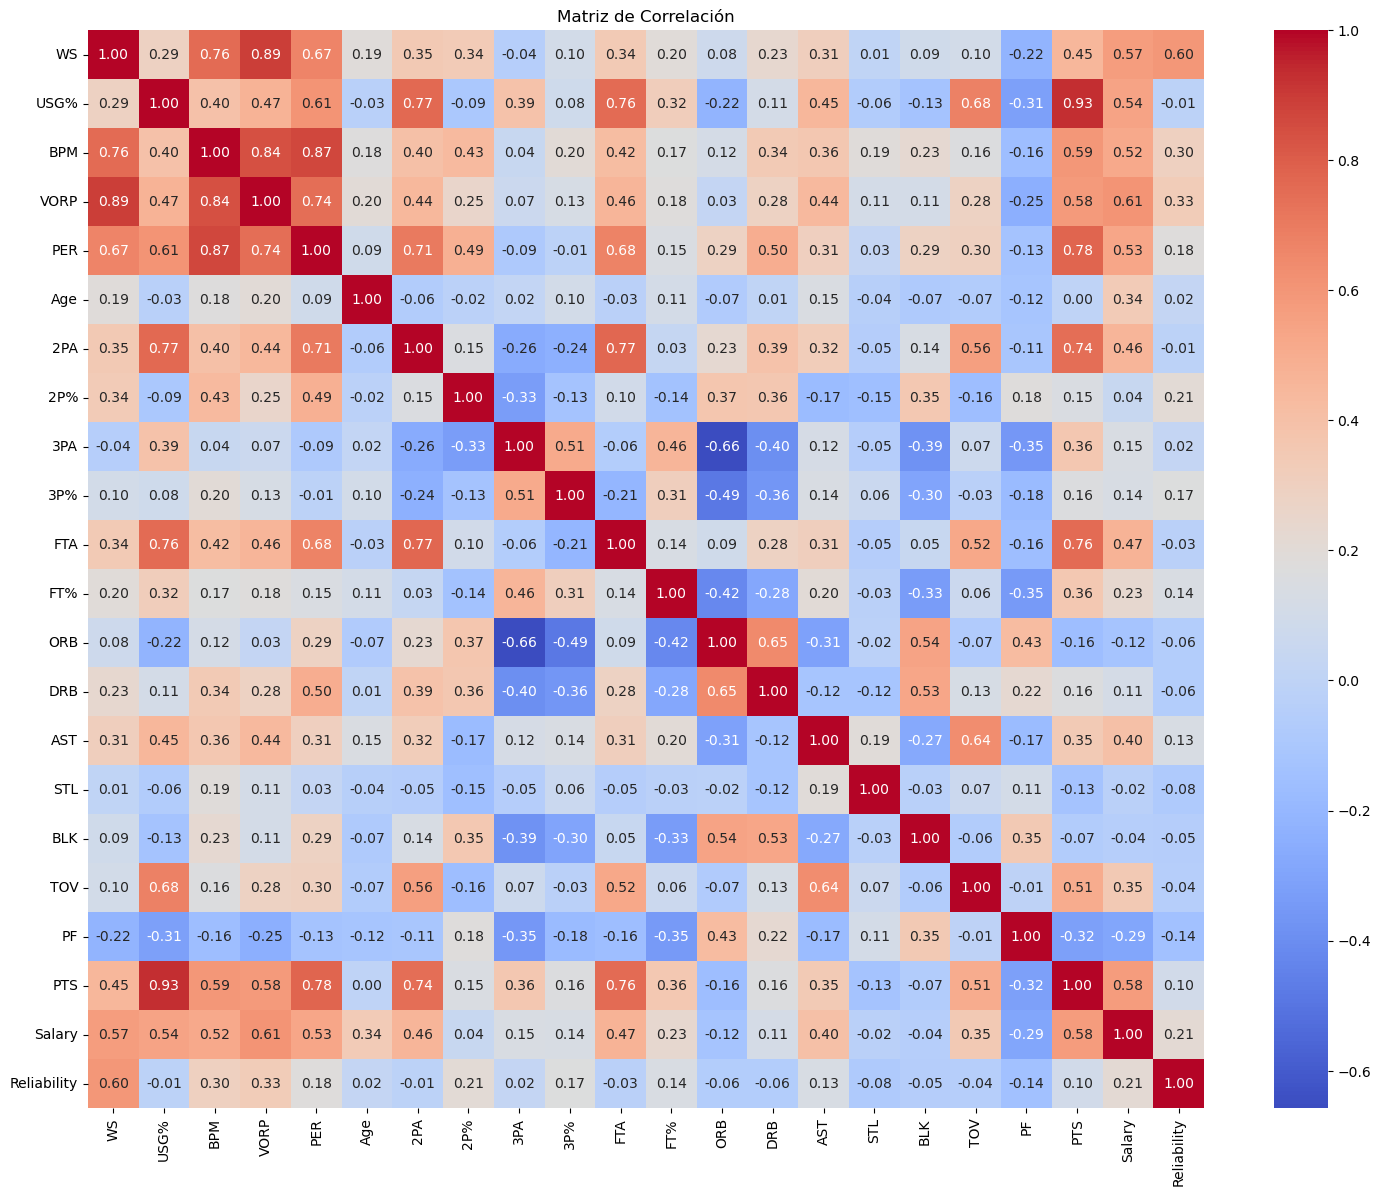

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))  # Ajusta el tamaño según lo que necesites
corr = M_Final_DB_Num.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Lo que podemos ver en estas correlaciones son resultados esperados. Como que los jugadores que más puntos generan son lo que tienen myor usage y a su vez mayoes intentos de tiro. 

Otras correlaciones interesantes son la parte superior izquierda que muestra que las win shares estan fuertemente correlacionadas con otras metricas avanzadas de desempeño.

Por último una correlacion negativa que me gustria destacar son los Rebotes Ofensivos y los intentos de triple, esto sugiere que aquellos jugadore que no suelen intentar triple suelen grabitas más cerca de la canasta a la ofensiva lo que por ende los lleva a pelear más rebotes.